### Importing Libraries

In [ ]:
# !pip install scikit-learn

In [60]:
# !pip install -U imbalanced-learn

In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from imblearn.combine import SMOTEENN  # for handling imbalanced dataset

#### Reading csv

In [10]:
df=pd.read_csv("tel_churn.csv")
df.head()

,Unnamed: 0,SeniorCitizen,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,0,29.85,29.85,0,1,0,0,1,1,...,0,0,1,0,1,0,0,0,0,0
1,1,0,56.95,1889.50,0,0,1,1,0,1,...,0,0,0,1,0,0,1,0,0,0
2,2,0,53.85,108.15,1,0,1,1,0,1,...,0,0,0,1,1,0,0,0,0,0
3,3,0,42.30,1840.75,0,0,1,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,4,0,70.70,151.65,1,1,0,1,0,1,...,0,0,1,0,1,0,0,0,0,0


In [11]:
df=df.drop('Unnamed: 0',axis=1)

In [12]:
x=df.drop('Churn',axis=1)
x

,SeniorCitizen,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,...,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,tenure_group_1 - 12,tenure_group_13 - 24,tenure_group_25 - 36,tenure_group_37 - 48,tenure_group_49 - 60,tenure_group_61 - 72
0,0,29.85,29.85,1,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,0
1,0,56.95,1889.50,0,1,1,0,1,0,0,...,0,0,0,1,0,0,1,0,0,0
2,0,53.85,108.15,0,1,1,0,1,0,0,...,0,0,0,1,1,0,0,0,0,0
3,0,42.30,1840.75,0,1,1,0,1,0,1,...,1,0,0,0,0,0,0,1,0,0
4,0,70.70,151.65,1,0,1,0,1,0,0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7027,0,84.80,1990.50,0,1,0,1,0,1,0,...,0,0,0,1,0,1,0,0,0,0
7028,0,103.20,7362.90,1,0,0,1,0,1,0,...,0,1,0,0,0,0,0,0,0,1
7029,0,29.60,346.45,1,0,0,1,0,1,1,...,0,0,1,0,1,0,0,0,0,0
7030,1,74.40,306.60,0,1,0,1,1,0,0,...,0,0,0,1,1,0,0,0,0,0


In [13]:
y=df['Churn']
y

0       0
1       0
2       1
3       0
4       1
       ..
7027    0
7028    0
7029    0
7030    1
7031    0
Name: Churn, Length: 7032, dtype: int64

#### Train Test Split

In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

#### Logistic Regression

In [56]:
from sklearn.linear_model import LogisticRegression
model_logreg=LogisticRegression(max_iter=1000)

model_logreg.fit(x_train,y_train)
y_pred_lor = model_logreg.predict(x_test)
y_pred_lor

C:\Users\Sanjli Kumari\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


array([0, 0, 0, ..., 0, 0, 0])

In [59]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_lor)
conf_matrix = confusion_matrix(y_test, y_pred_lor)
class_report = classification_report(y_test, y_pred_lor)

# Print the evaluation results
print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.798862828713575
Confusion Matrix:
 [[945  85]
 [198 179]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.92      0.87      1030
           1       0.68      0.47      0.56       377

    accuracy                           0.80      1407
   macro avg       0.75      0.70      0.71      1407
weighted avg       0.79      0.80      0.79      1407



#### Decision Tree Classifier

In [15]:
model_dt = DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [16]:
model_dt.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

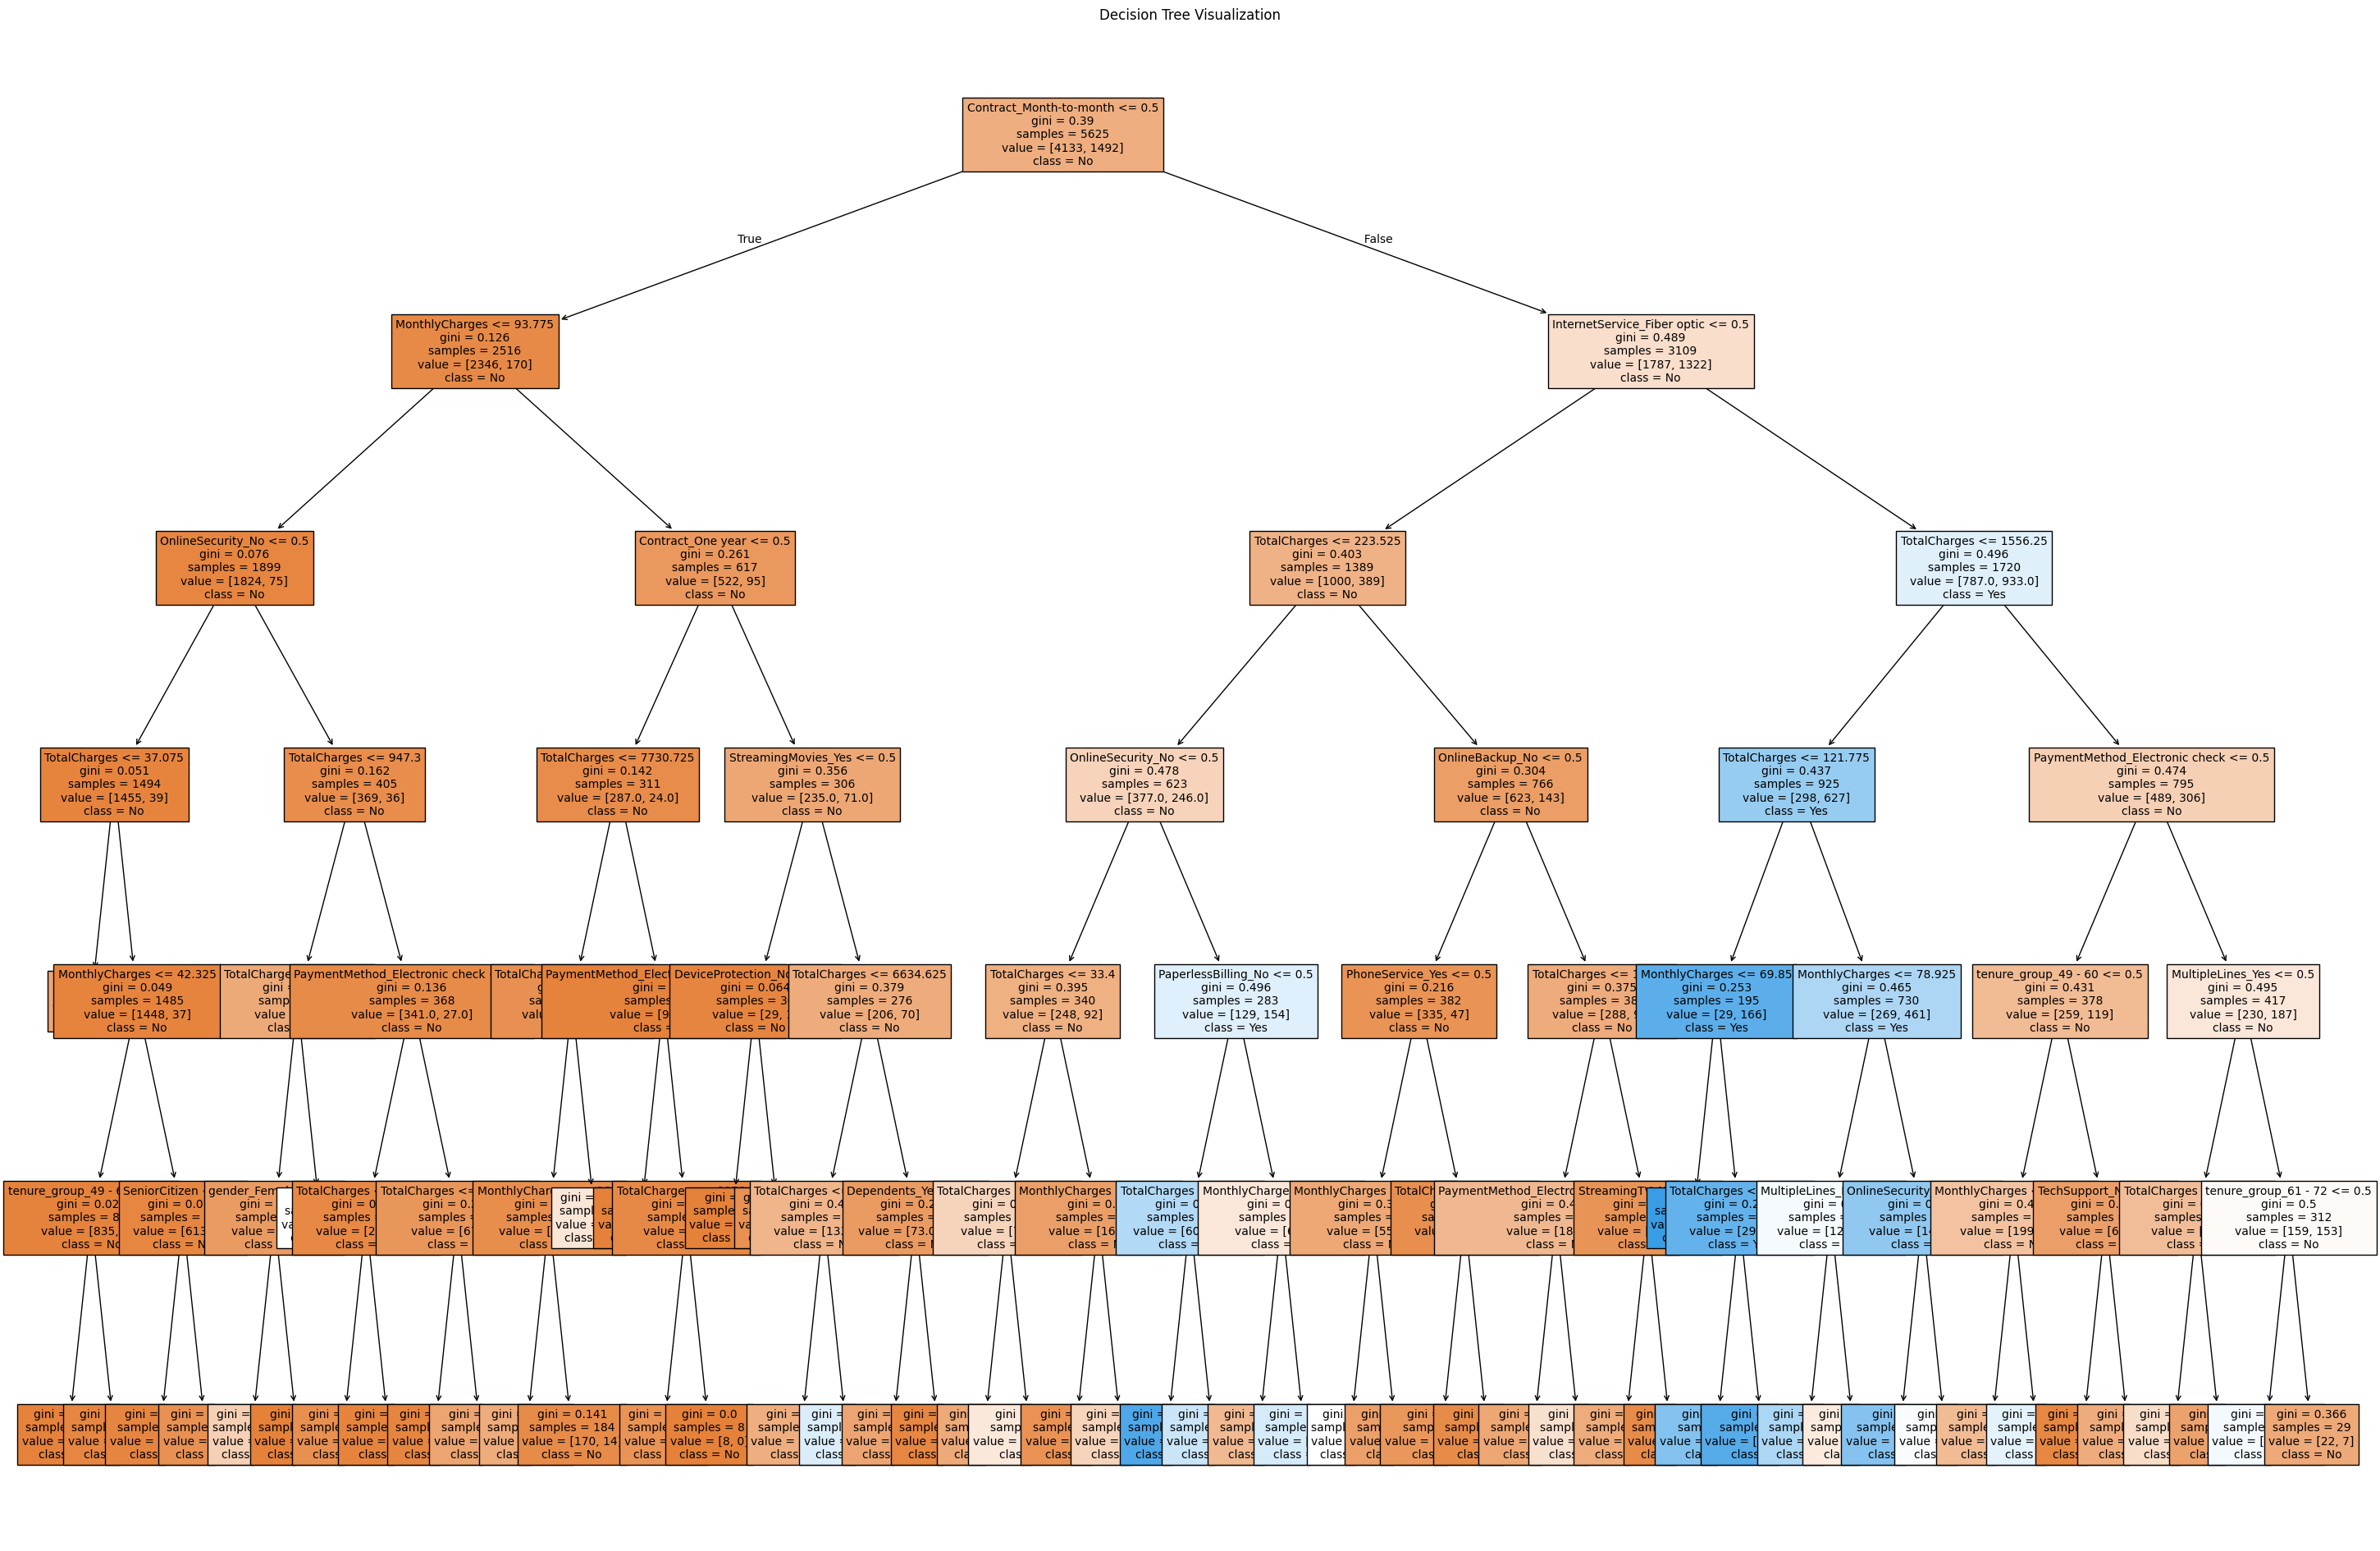

In [26]:
from sklearn.tree import plot_tree
plt.figure(figsize=(36,24))
plot_tree(model_dt, filled=True, feature_names=x_train.columns, class_names=['No', 'Yes'], fontsize=10)  # Customize as needed
plt.title("Decision Tree Visualization")

# Save the plot
plt.savefig("decision_tree_plot.png", format='png', dpi=300)

plt.show()

In [27]:
y_pred=model_dt.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [28]:
model_dt.score(x_test,y_test)

0.7882018479033405

In [29]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86      1030
           1       0.62      0.54      0.58       377

    accuracy                           0.79      1407
   macro avg       0.73      0.71      0.72      1407
weighted avg       0.78      0.79      0.78      1407



#### Note
- As you can see that the accuracy is quite low, and as it's an imbalanced dataset, we shouldn't consider Accuracy as our metrics to measure the model, as Accuracy is cursed in imbalanced datasets.

**Hence, we need to check recall, precision & f1 score for the minority class, and it's quite evident that the precision, recall & f1 score is too low for Class 1, i.e. churned customers.**

- So, moving ahead to call SMOTEENN (UpSampling + ENN)
- Upsampling: Increasing minority class in the sample
- ENN (Edited Nearest Neighbors)

In [32]:
sm = SMOTEENN()
X_resampled, y_resampled = sm.fit_resample(x,y)

In [33]:
xr_train,xr_test,yr_train,yr_test=train_test_split(X_resampled, y_resampled,test_size=0.2)

In [34]:
model_dt_smote=DecisionTreeClassifier(criterion = "gini",random_state = 100,max_depth=6, min_samples_leaf=8)

In [35]:
model_dt_smote.fit(xr_train,yr_train)
yr_predict = model_dt_smote.predict(xr_test)
model_score_r = model_dt_smote.score(xr_test, yr_test)
print(model_score_r)
print(metrics.classification_report(yr_test, yr_predict))

0.9395744680851064
              precision    recall  f1-score   support

           0       0.95      0.92      0.93       550
           1       0.93      0.95      0.94       625

    accuracy                           0.94      1175
   macro avg       0.94      0.94      0.94      1175
weighted avg       0.94      0.94      0.94      1175



In [36]:
print(metrics.confusion_matrix(yr_test, yr_predict))

[[508  42]
 [ 29 596]]


###### Now we can see quite better results, i.e. Accuracy: 92 %, and a very good recall, precision & f1 score for minority class.

###### Let's try with some other classifier.

#### Random Forest Classifier

In [37]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model_rf=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [39]:
model_rf.fit(x_train,y_train)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [40]:
y_pred=model_rf.predict(x_test)

In [41]:
model_rf.score(x_test,y_test)

0.7931769722814499

In [42]:
print(classification_report(y_test, y_pred, labels=[0,1]))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1030
           1       0.70      0.41      0.51       377

    accuracy                           0.79      1407
   macro avg       0.75      0.67      0.69      1407
weighted avg       0.78      0.79      0.77      1407



In [44]:
sm = SMOTEENN()
X_resampled1, y_resampled1 = sm.fit_resample(x,y)

In [45]:
xr_train1,xr_test1,yr_train1,yr_test1=train_test_split(X_resampled1, y_resampled1,test_size=0.2)

In [46]:
model_rf_smote=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [47]:
model_rf_smote.fit(xr_train1,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [48]:
yr_predict1 = model_rf_smote.predict(xr_test1)

In [49]:
model_score_r1 = model_rf_smote.score(xr_test1, yr_test1)

In [50]:
print(model_score_r1)
print(metrics.classification_report(yr_test1, yr_predict1))

0.9357326478149101
              precision    recall  f1-score   support

           0       0.95      0.90      0.92       511
           1       0.93      0.96      0.94       656

    accuracy                           0.94      1167
   macro avg       0.94      0.93      0.93      1167
weighted avg       0.94      0.94      0.94      1167



In [51]:
print(metrics.confusion_matrix(yr_test1, yr_predict1))

[[461  50]
 [ 25 631]]


#### Note
1. With RF Classifier, also we are able to get quite good results, infact better than Decision Tree.

2. We can now further go ahead and create multiple classifiers to see how the model performance is, but that's not covered here, so you can do it by yourself :)

#### Performing PCA

In [61]:
# Applying PCA
from sklearn.decomposition import PCA
pca = PCA(0.9)
xr_train_pca = pca.fit_transform(xr_train1)
xr_test_pca = pca.transform(xr_test1)
explained_variance = pca.explained_variance_ratio_

In [62]:
model=RandomForestClassifier(n_estimators=100, criterion='gini', random_state = 100,max_depth=6, min_samples_leaf=8)

In [63]:
model.fit(xr_train_pca,yr_train1)

RandomForestClassifier(max_depth=6, min_samples_leaf=8, random_state=100)

In [64]:
yr_predict_pca = model.predict(xr_test_pca)

In [65]:
model_score_r_pca = model.score(xr_test_pca, yr_test1)

In [66]:
print(model_score_r_pca)
print(metrics.classification_report(yr_test1, yr_predict_pca))

0.7309340188517567
              precision    recall  f1-score   support

           0       0.72      0.64      0.67       511
           1       0.74      0.80      0.77       656

    accuracy                           0.73      1167
   macro avg       0.73      0.72      0.72      1167
weighted avg       0.73      0.73      0.73      1167



### Result
Even with PCA, we couldn't see any better results, hence finalised the model which was created by RF Classifier, and save the model so that we can use it in a later stage :)

#### Future Things to do

In [67]:
## Pickling the model
# import pickle
# filename = 'model.sav'
# pickle.dump(model_rf_smote, open(filename, 'wb'))
# load_model = pickle.load(open(filename, 'rb'))
# model_score_r1 = load_model.score(xr_test1, yr_test1)
# model_score_r1
# Our final model i.e. RF Classifier with SMOTEENN, is now ready and dumped in model.sav, which we will use 
# and prepare API's so that we can access our model from UI.